In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd
import random
from functions import *

random.seed(26)
np.random.seed(26)

IndentationError: unindent does not match any outer indentation level (functions.py, line 450)

In [2]:
ds = pd.read_csv("poly_regression_large.csv")
# Inspect the data
print(f"Shape of the data: {ds.shape}")
# Convert data into a matrix
data = np.array(ds)

# Extract the test part
X = data[:, 1]
Y = data[:, 2]
_, (X_test, Y_test) = split_data(X, Y, per_train=0.8)

train_csv = pd.read_csv("poly_regression_small.csv")
train = np.array(train_csv)
X_train, Y_train = train[:, 1], train[:, 2]
print(f"Shape of the training data: {X_train.shape}")

Shape of the data: (1000, 3)
Train test split = 800, 200
Shape of the training data: (50,)


In [3]:
titles_MLE = ["$\\theta_{MLE}$ using GD", "$\\theta_{MLE}$ using SGD", "$\\theta_{MLE}$ using Normal Equation"]
titles_MAP = ["$\\theta_{MAP}$ using GD", "$\\theta_{MAP}$ using SGD", "$\\theta_{MAP}$ using Normal Equation"]
train_data = (X_train, Y_train)
kk = list(range(2,12)) # polynomial degrees


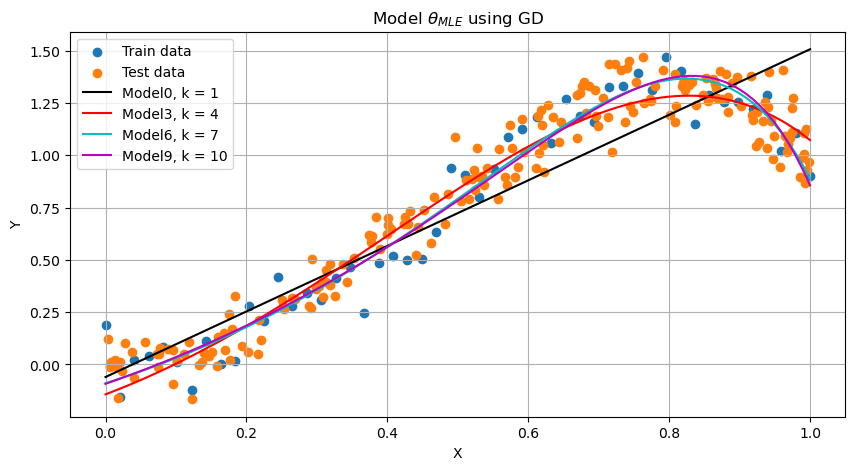

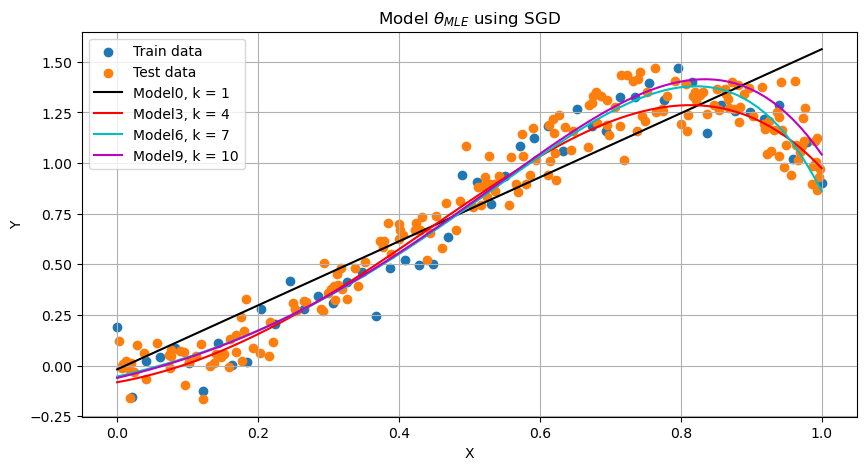

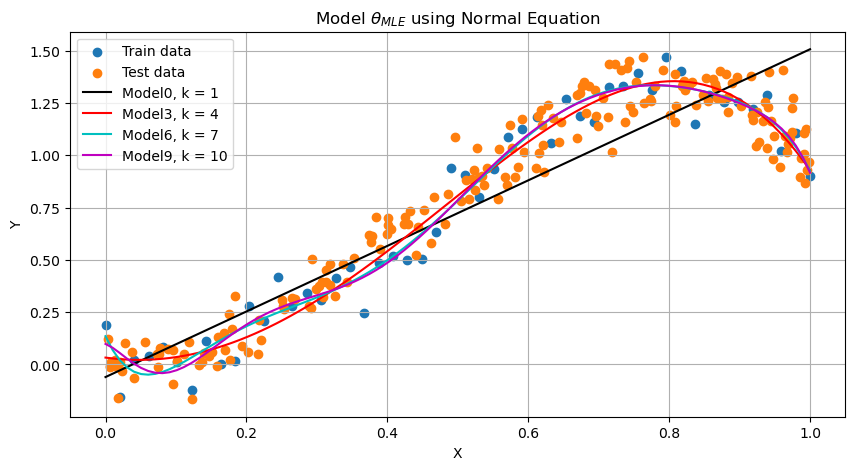

In [4]:
# data needed for GD
epoch_or_iter = 500
# MLE GD
thetas_history_GD_MLE, converging_kk_history_GD_MLE = compute_weights(
    'GD', 'MLE', kk, train_data, loss=loss_MLE
    , grad_loss=grad_loss_MLE, kmax=epoch_or_iter)
# plot
plot_poly_regression(
    X_train, Y_train, X_test, Y_test, thetas_history_GD_MLE, 
    title=titles_MLE[0])

# data needed for SGD
batch_size = 5
alpha = 0.1
# MLE SGD
thetas_history_SGD_MLE, converging_kk_history_SGD_MLE = compute_weights(
     'SGD', 'MLE', kk ,train_data,loss=loss_MLE, 
     grad_loss=grad_loss_MLE,batch_size = batch_size, 
     n_epochs=epoch_or_iter, alpha = 0.1)
# plot
plot_poly_regression(
    X_train, Y_train, X_test, Y_test, thetas_history_SGD_MLE,
    title=titles_MLE[1])

# data needed for Normal
# MLE Normal
thetas_history_norm_MLE, converging_kk_history = compute_weights(
    'Normal', 'MLE', kk ,train_data)
# plot
plot_poly_regression(
    X_train, Y_train, X_test, Y_test, thetas_history_norm_MLE
    ,title=titles_MLE[2])

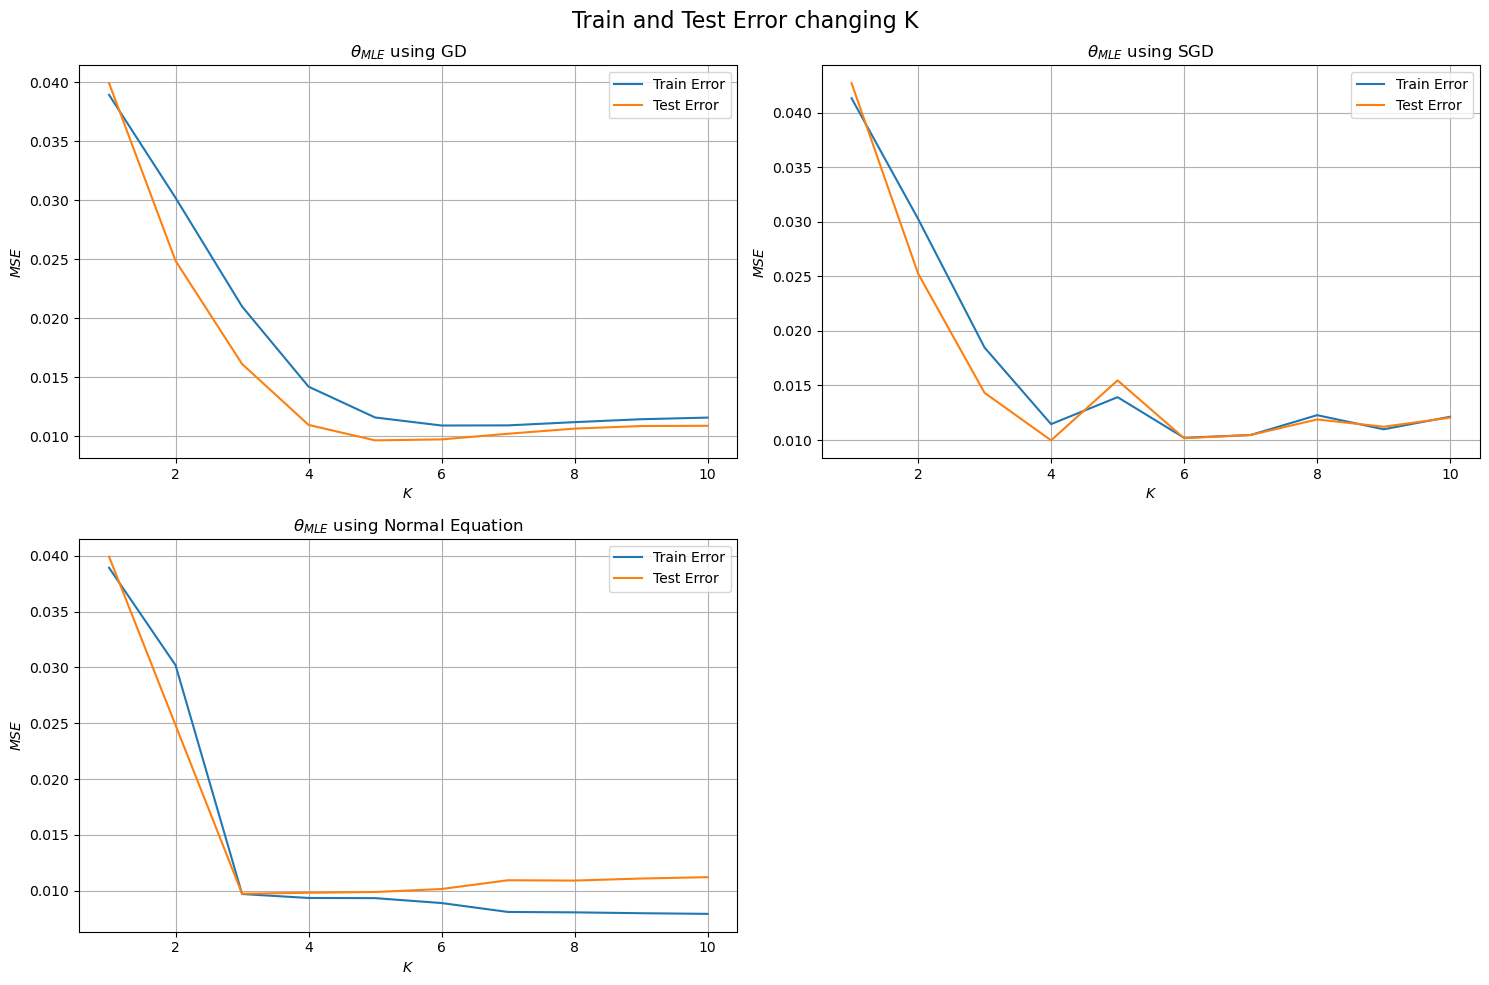

$\theta_{MLE}$ using GD
K=1: Train Error=0.03892640177770726, Test Error=0.039914460590037205
K=2: Train Error=0.030197329059124426, Test Error=0.024861030146184935
K=3: Train Error=0.020991222010353083, Test Error=0.01611923966322624
K=4: Train Error=0.014197671497168758, Test Error=0.010956441247066946
K=5: Train Error=0.011587499916256268, Test Error=0.009647288744768353
K=6: Train Error=0.01090569405065598, Test Error=0.00972875149324317
K=7: Train Error=0.010917092833946545, Test Error=0.01020894115477287
K=8: Train Error=0.011191343905128673, Test Error=0.010644206967270167
K=9: Train Error=0.011438428405435163, Test Error=0.010860796606196384
K=10: Train Error=0.011576456881743462, Test Error=0.010882643870081296
$\theta_{MLE}$ using SGD
K=1: Train Error=0.04132078730403181, Test Error=0.04270115845783106
K=2: Train Error=0.030268439322038165, Test Error=0.025255607726808297
K=3: Train Error=0.0184717412228156, Test Error=0.01432462776371803
K=4: Train Error=0.011457224651104434

In [ ]:
#plot the train and test error respect to k
theta_histories = [thetas_history_GD_MLE, thetas_history_SGD_MLE, thetas_history_norm_MLE]
plot_train_test_error_respect_to_k(X_train, Y_train, X_test, Y_test, theta_histories, titles=titles_MLE)

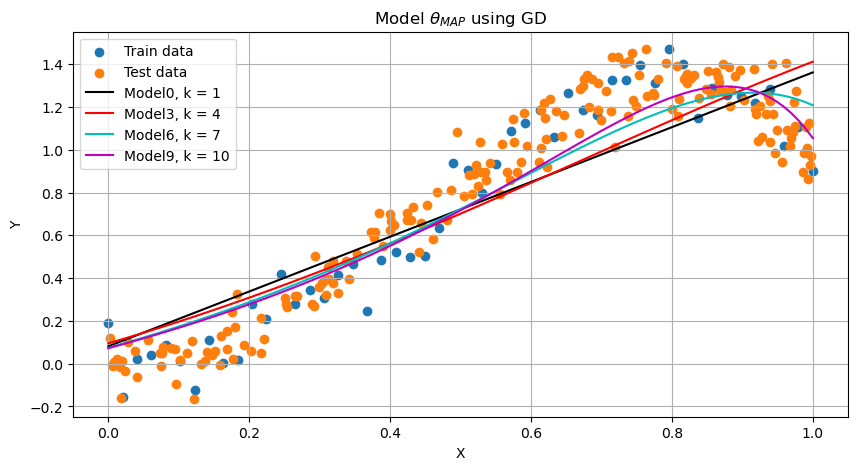

ValueError: too many values to unpack (expected 2)

In [ ]:
# universal data needed for MAP
lam = 1

# data needed for GD
epoch_or_iter = 500
# MAP GD
thetas_history_GD_MAP, converging_kk_history_GD_MAP = compute_weights(
    'GD', 'MAP', kk, train_data, lam = lam, loss=loss_MAP
    , grad_loss=grad_loss_MAP, kmax=epoch_or_iter)
# plot
plot_poly_regression(
    X_train, Y_train, X_test, Y_test, thetas_history_GD_MAP, 
    title=titles_MAP[0])

# data needed for SGD
batch_size = 5
alpha = 0.001
# MAP SGD
thetas_history_SGD_MAP, converging_kk_history_SGD_MAP = compute_weights(
     'SGD', 'MAP', kk ,train_data, lam = lam,loss=loss_MAP, 
     grad_loss=grad_loss_MAP,batch_size = batch_size, 
     n_epochs=epoch_or_iter, alpha = 0.1)
# plot
plot_poly_regression(
    X_train, Y_train, X_test, Y_test, thetas_history_SGD_MAP,
    title=titles_MAP[1])

# data needed for Normal
lam = 100
# MAP Normal
thetas_history_norm_MAP, converging_kk_history = compute_weights(
    'Normal', 'MAP', kk ,train_data, lam= lam)
# plot
plot_poly_regression(
    X_train, Y_train, X_test, Y_test, thetas_history_norm_MAP
    ,title=titles_MAP[2])